# Data Presentation

In [1]:
#install packages
import pysal as ps
import numpy as np # For working with numerical data
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt # For plotting
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels

from math import ceil

from sklearn.preprocessing import RobustScaler
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering 
from esda.adbscan import ADBSCAN

from scipy.cluster.hierarchy import dendrogram

import spopt
from spopt.region import MaxPHeuristic as MaxP
import matplotlib.pyplot as plt

import libpysal
import warnings

import matplotlib.cm
from matplotlib import colors
             
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

In [2]:
#import deprivation scores data
IoD_domain_score = pd.read_csv('birth/imd/IoD2019_Scores.csv')
IoD_domain_score

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Health Deprivation and Disability Score,Crime Score,Barriers to Housing and Services Score,Living Environment Score,Income Deprivation Affecting Children Index (IDACI) Score (rate),Income Deprivation Affecting Older People (IDAOPI) Score (rate),Children and Young People Sub-domain Score,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score,Wider Barriers Sub-domain Score,Indoors Sub-domain Score,Outdoors Sub-domain Score
0,E01000001,City of London 001A,E09000001,City of London,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873,0.006,0.012,-2.107,0.032,-0.430,3.587,0.006,1.503
1,E01000002,City of London 001B,E09000001,City of London,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084,0.037,0.030,-1.907,0.034,-1.060,3.231,-0.410,1.196
2,E01000003,City of London 001C,E09000001,City of London,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535,0.052,0.128,-0.292,0.142,-0.691,5.173,-0.054,2.207
3,E01000005,City of London 001E,E09000001,City of London,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,0.209,0.322,0.338,0.321,-1.167,5.361,-0.604,1.769
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0.155,0.162,-0.366,0.325,-0.400,5.590,0.110,0.969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32839,E01033764,Liverpool 022E,E08000012,Liverpool,74.468,0.470,0.341,73.723,2.361,1.316,16.867,20.426,0.414,0.544,1.135,0.613,-0.402,0.969,-0.189,0.750
32840,E01033765,Liverpool 061D,E08000012,Liverpool,59.599,0.362,0.280,59.571,1.665,1.015,19.411,12.584,0.492,0.455,1.374,0.479,-0.098,0.874,-0.554,0.283
32841,E01033766,Liverpool 042G,E08000012,Liverpool,21.895,0.099,0.073,11.133,0.823,0.054,4.477,58.942,0.097,0.207,0.138,0.178,-1.459,-1.360,1.513,0.629
32842,E01033767,Liverpool 050J,E08000012,Liverpool,66.704,0.396,0.291,64.836,1.828,0.314,11.968,57.424,0.520,0.465,1.651,0.465,-1.437,0.745,1.524,0.417


In [3]:
#import 
IoD_domain_score.rename(columns = {'Index of Multiple Deprivation (IMD) Score':'IMD',
                                   'Income Score (rate)':'Income',
                     'Employment Score (rate)':'Employment', 
                    'Education, Skills and Training Score' : 'Education',
                      'Health Deprivation and Disability Score' : 'Health', 
                    'Crime Score': 'Crime',
                    'Barriers to Housing and Services Score' : 'Services',
                    'Living Environment Score' : 'Living'}, 
          inplace = True)
IoD_domain_score.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),IMD,Income,Employment,Education,Health,Crime,Services,Living,Income Deprivation Affecting Children Index (IDACI) Score (rate),Income Deprivation Affecting Older People (IDAOPI) Score (rate),Children and Young People Sub-domain Score,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score,Wider Barriers Sub-domain Score,Indoors Sub-domain Score,Outdoors Sub-domain Score
0,E01000001,City of London 001A,E09000001,City of London,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873,0.006,0.012,-2.107,0.032,-0.430,3.587,0.006,1.503
1,E01000002,City of London 001B,E09000001,City of London,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084,0.037,0.030,-1.907,0.034,-1.060,3.231,-0.410,1.196
2,E01000003,City of London 001C,E09000001,City of London,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535,0.052,0.128,-0.292,0.142,-0.691,5.173,-0.054,2.207
3,E01000005,City of London 001E,E09000001,City of London,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,0.209,0.322,0.338,0.321,-1.167,5.361,-0.604,1.769
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0.155,0.162,-0.366,0.325,-0.400,5.590,0.110,0.969


In [5]:
IoD_domain_score_select = IoD_domain_score [[ 'LSOA code (2011)','LSOA name (2011)','IMD','Income', 'Employment', 'Education','Health', 'Crime','Services','Living' ]]
IoD_domain_score_select

,LSOA code (2011),LSOA name (2011),IMD,Income,Employment,Education,Health,Crime,Services,Living
0,E01000001,City of London 001A,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873
1,E01000002,City of London 001B,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084
2,E01000003,City of London 001C,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535
3,E01000005,City of London 001E,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979
4,E01000006,Barking and Dagenham 016A,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888
...,...,...,...,...,...,...,...,...,...,...
32839,E01033764,Liverpool 022E,74.468,0.470,0.341,73.723,2.361,1.316,16.867,20.426
32840,E01033765,Liverpool 061D,59.599,0.362,0.280,59.571,1.665,1.015,19.411,12.584
32841,E01033766,Liverpool 042G,21.895,0.099,0.073,11.133,0.823,0.054,4.477,58.942
32842,E01033767,Liverpool 050J,66.704,0.396,0.291,64.836,1.828,0.314,11.968,57.424


In [6]:
birth2011_20 = pd.read_csv('birth/Births_2011_2020_edit.csv')
birth2011_20

,Row Labels,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Grand Total
0,E01000001,15,7,7,15,12,12,15,15,7,13,118
1,E01000002,13,8,12,12,11,6,8,7,9,7,93
2,E01000003,17,14,19,9,10,14,16,6,19,10,134
3,E01000005,15,11,12,16,11,12,9,17,8,8,119
4,E01000006,31,42,24,46,33,38,45,44,37,59,399
...,...,...,...,...,...,...,...,...,...,...,...,...
34748,W01001954,12,8,10,10,10,8,8,4,8,6,84
34749,W01001955,9,9,7,9,13,8,8,13,14,16,106
34750,W01001956,19,19,15,17,10,11,9,11,9,20,140
34751,W01001957,6,6,6,6,12,6,8,11,5,8,74


In [7]:
birth2019 = birth2011_20 [['Row Labels','2019']]
birth2019

,Row Labels,2019
0,E01000001,7
1,E01000002,9
2,E01000003,19
3,E01000005,8
4,E01000006,37
...,...,...
34748,W01001954,8
34749,W01001955,14
34750,W01001956,9
34751,W01001957,5


In [8]:
population = pd.read_csv('birth/female2019_LSOA.csv')
population

/tmp/ipykernel_66595/4076426864.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  population = pd.read_csv('birth/female2019_LSOA.csv')


,LSOA Code,LSOA Name,LA Code (2019 boundaries),LA name (2019 boundaries),LA Code (2020 boundaries),LA name (2020 boundaries),All Ages,0,1,2,...,82,83,84,85,86,87,88,89,90+,15_44_pop
0,E01011949,Hartlepool 009A,E06000001,Hartlepool,E06000001,Hartlepool,"1,029",12,11,5,...,8,4,5,7,2,2,1,0,7,390
1,E01011950,Hartlepool 008A,E06000001,Hartlepool,E06000001,Hartlepool,604,8,3,6,...,1,0,3,0,0,2,0,1,3,230
2,E01011951,Hartlepool 007A,E06000001,Hartlepool,E06000001,Hartlepool,551,8,4,2,...,1,3,2,2,2,2,4,1,1,238
3,E01011952,Hartlepool 002A,E06000001,Hartlepool,E06000001,Hartlepool,944,17,15,6,...,7,4,7,11,11,11,10,10,57,300
4,E01011953,Hartlepool 002B,E06000001,Hartlepool,E06000001,Hartlepool,999,7,18,21,...,4,3,3,1,0,0,1,1,5,402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34748,W01001320,Merthyr Tydfil 007C,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,713,9,6,10,...,3,5,6,5,2,2,3,4,4,235
34749,W01001321,Merthyr Tydfil 007D,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,818,8,12,12,...,2,5,3,0,6,1,2,3,11,314
34750,W01001322,Merthyr Tydfil 007E,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,842,8,20,14,...,6,5,3,2,3,2,5,0,9,306
34751,W01001324,Merthyr Tydfil 003E,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,"1,047",4,19,8,...,10,10,8,7,7,3,7,5,21,347


In [9]:
population2019 = population [['LSOA Code','All Ages']]
population2019

,LSOA Code,All Ages
0,E01011949,"1,029"
1,E01011950,604
2,E01011951,551
3,E01011952,944
4,E01011953,999
...,...,...
34748,W01001320,713
34749,W01001321,818
34750,W01001322,842
34751,W01001324,"1,047"


In [10]:
domain_score_birth = IoD_domain_score_select.merge(birth2019, left_on='LSOA code (2011)', right_on='Row Labels')
domain_score_birth

,LSOA code (2011),LSOA name (2011),IMD,Income,Employment,Education,Health,Crime,Services,Living,Row Labels,2019
0,E01000001,City of London 001A,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873,E01000001,7
1,E01000002,City of London 001B,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084,E01000002,9
2,E01000003,City of London 001C,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535,E01000003,19
3,E01000005,City of London 001E,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,E01000005,8
4,E01000006,Barking and Dagenham 016A,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,E01000006,37
...,...,...,...,...,...,...,...,...,...,...,...,...
32839,E01033764,Liverpool 022E,74.468,0.470,0.341,73.723,2.361,1.316,16.867,20.426,E01033764,39
32840,E01033765,Liverpool 061D,59.599,0.362,0.280,59.571,1.665,1.015,19.411,12.584,E01033765,10
32841,E01033766,Liverpool 042G,21.895,0.099,0.073,11.133,0.823,0.054,4.477,58.942,E01033766,16
32842,E01033767,Liverpool 050J,66.704,0.396,0.291,64.836,1.828,0.314,11.968,57.424,E01033767,22


In [11]:
domain_score_birth_pop = domain_score_birth.merge(population2019, left_on='LSOA code (2011)', right_on='LSOA Code')
domain_score_birth_pop

,LSOA code (2011),LSOA name (2011),IMD,Income,Employment,Education,Health,Crime,Services,Living,Row Labels,2019,LSOA Code,All Ages
0,E01000001,City of London 001A,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873,E01000001,7,E01000001,750
1,E01000002,City of London 001B,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084,E01000002,9,E01000002,743
2,E01000003,City of London 001C,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535,E01000003,19,E01000003,855
3,E01000005,City of London 001E,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,E01000005,8,E01000005,866
4,E01000006,Barking and Dagenham 016A,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,E01000006,37,E01000006,"1,022"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32839,E01033764,Liverpool 022E,74.468,0.470,0.341,73.723,2.361,1.316,16.867,20.426,E01033764,39,E01033764,"1,525"
32840,E01033765,Liverpool 061D,59.599,0.362,0.280,59.571,1.665,1.015,19.411,12.584,E01033765,10,E01033765,772
32841,E01033766,Liverpool 042G,21.895,0.099,0.073,11.133,0.823,0.054,4.477,58.942,E01033766,16,E01033766,502
32842,E01033767,Liverpool 050J,66.704,0.396,0.291,64.836,1.828,0.314,11.968,57.424,E01033767,22,E01033767,510


In [15]:
IoDdomain_birth_pop_LSOA = domain_score_birth_pop [[ 'LSOA code (2011)','2019','All Ages','IMD','Income', 
                                             'Employment', 'Education','Health', 'Crime','Services',
                                             'Living' ]]
IoDdomain_birth_pop_LSOA

,LSOA code (2011),2019,All Ages,IMD,Income,Employment,Education,Health,Crime,Services,Living
0,E01000001,7,750,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873
1,E01000002,9,743,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084
2,E01000003,19,855,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535
3,E01000005,8,866,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979
4,E01000006,37,"1,022",19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888
...,...,...,...,...,...,...,...,...,...,...,...
32839,E01033764,39,"1,525",74.468,0.470,0.341,73.723,2.361,1.316,16.867,20.426
32840,E01033765,10,772,59.599,0.362,0.280,59.571,1.665,1.015,19.411,12.584
32841,E01033766,16,502,21.895,0.099,0.073,11.133,0.823,0.054,4.477,58.942
32842,E01033767,22,510,66.704,0.396,0.291,64.836,1.828,0.314,11.968,57.424


In [16]:
IoDdomain_birth_pop_LSOA.to_csv('birth_imd.csv')

In [17]:
birth_imd = pd.read_csv('birth_imd.csv')
birth_imd

,LSOA code (2011),2019,All Ages,birth_rate,IMD,Income,Employment,Education,Health,Crime,Services,Living
0,E01000001,7,750,9.333333,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873
1,E01000002,9,743,12.113055,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084
2,E01000003,19,855,22.222222,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535
3,E01000005,8,866,9.237875,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979
4,E01000006,37,"1,022",36.203522,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888
...,...,...,...,...,...,...,...,...,...,...,...,...
32839,E01033764,39,"1,525",25.573770,74.468,0.470,0.341,73.723,2.361,1.316,16.867,20.426
32840,E01033765,10,772,12.953368,59.599,0.362,0.280,59.571,1.665,1.015,19.411,12.584
32841,E01033766,16,502,31.872510,21.895,0.099,0.073,11.133,0.823,0.054,4.477,58.942
32842,E01033767,22,510,43.137255,66.704,0.396,0.291,64.836,1.828,0.314,11.968,57.424


In [19]:
birth_imd_select = birth_imd [[ 'LSOA code (2011)','birth_rate','IMD']]
birth_imd_select

,LSOA code (2011),birth_rate,IMD
0,E01000001,9.333333,6.208
1,E01000002,12.113055,5.143
2,E01000003,22.222222,19.402
3,E01000005,9.237875,28.652
4,E01000006,36.203522,19.837
...,...,...,...
32839,E01033764,25.573770,74.468
32840,E01033765,12.953368,59.599
32841,E01033766,31.872510,21.895
32842,E01033767,43.137255,66.704


In [43]:
gdf = gpd.read_file("https://github.com/Fayee23/FSDS_A2/blob/main/data/LSOA2011.gpkg?raw=true")  # read shapefile
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LSOA11CD   4835 non-null   object  
 1   LSOA11NM   4835 non-null   object  
 2   MSOA11CD   4835 non-null   object  
 3   MSOA11NM   4835 non-null   object  
 4   LAD11CD    4835 non-null   object  
 5   LAD11NM    4835 non-null   object  
 6   RGN11CD    4835 non-null   object  
 7   RGN11NM    4835 non-null   object  
 8   USUALRES   4835 non-null   int64   
 9   HHOLDRES   4835 non-null   int64   
 10  COMESTRES  4835 non-null   int64   
 11  POPDEN     4835 non-null   float64 
 12  HHOLDS     4835 non-null   int64   
 13  AVHHOLDSZ  4835 non-null   float64 
 14  geometry   4835 non-null   geometry
dtypes: float64(2), geometry(1), int64(4), object(8)
memory usage: 566.7+ KB


In [44]:
gdf_select = gdf[['LSOA11CD', 'LSOA11NM','geometry']]

In [49]:
raw = pd.merge(birth_imd_select, gdf_select, left_on='LSOA code (2011)', right_on='LSOA11CD', how='inner').reset_index()
raw.shape

(4835, 8)

In [50]:
raw.head()

,index,LSOA code (2011),birth_rate,IMD,cluster_nm,LSOA11CD,LSOA11NM,geometry
0,0,E01000001,9.333333,6.208,0,E01000001,City of London 001A,"MULTIPOLYGON (((532105.092 182011.230, 532162...."
1,1,E01000002,12.113055,5.143,0,E01000002,City of London 001B,"MULTIPOLYGON (((532746.813 181786.891, 532671...."
2,2,E01000003,22.222222,19.402,0,E01000003,City of London 001C,"MULTIPOLYGON (((532135.145 182198.119, 532158...."
3,3,E01000005,9.237875,28.652,0,E01000005,City of London 001E,"MULTIPOLYGON (((533807.946 180767.770, 533649...."
4,4,E01000006,36.203522,19.837,0,E01000006,Barking and Dagenham 016A,"MULTIPOLYGON (((545122.049 184314.931, 545271...."


In [51]:
raw_select = raw[['LSOA11CD','birth_rate','IMD']].set_index('LSOA11CD').copy()
raw_select.head()

,birth_rate,IMD
LSOA11CD,,
E01000001,9.333333,6.208
E01000002,12.113055,5.143
E01000003,22.222222,19.402
E01000005,9.237875,28.652
E01000006,36.203522,19.837


<AxesSubplot:ylabel='Frequency'>

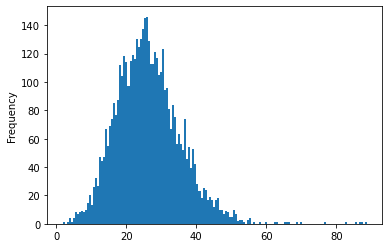

In [53]:
raw_select.birth_rate.plot.hist(bins=150)

In [54]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(10.0, 90.0))

normed = raw_select.copy()
for c in raw_select.columns.values:
    normed[c] = rs.fit_transform(raw[c].values.reshape(-1,1))
    print("The range of {} is [{}, {}]".format(c, normed[c].min(), normed[c].max()))
normed.head()

The range of birth_rate is [-1.0528885119557159, 2.7937442109302513]
The range of IMD is [-0.6235533107160376, 1.530536803775384]


,birth_rate,IMD
LSOA11CD,,
E01000001,-0.717950,-0.489439
E01000002,-0.594954,-0.526232
E01000003,-0.147649,-0.033615
E01000005,-0.722174,0.285952
E01000006,0.470989,-0.018587


<AxesSubplot:xlabel='IMD', ylabel='birth_rate'>

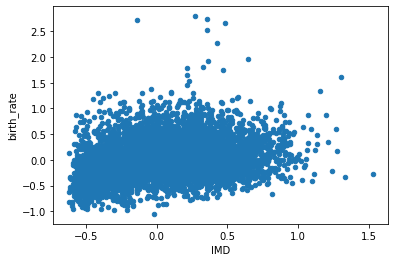

In [55]:
normed.plot.scatter(x='IMD', y='birth_rate')

In [56]:
def mapping_clusters(labels_cluster):
    birth_imd_select['cluster_nm'] = labels_cluster
    birth_imd_select.plot(column='cluster_nm', categorical=True, legend=True, figsize=(12,8), cmap='Paired');

In [57]:
# adapted from this tutorial: https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca
def radar_plot_cluster_centroids(df_cluster_centroid):
    # parameters
    # df_cluster_centroid: a dataframe with rows representing a cluster centroid and columns representing variables
    
    # add an additional element to both categories and restaurants that’s identical to the first item
    # manually 'close' the line
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    
    plt.figure(figsize=(12, 8))
    plt.subplot(polar=True)
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        label = "Cluster {}".format(index)
        plt.plot(label_loc, centroid, label=label)
    plt.title('Cluster centroid comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    plt.show()

In [58]:
minPts = 5 # we set minPts as normed.shape[1] + 1 
epsilon = 0.2
dbsc = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc.fit(normed)

# We now have our DBSCAN object created, and we can extract the groups it has identified. We do this using the `.labels_` method.
cluster_nm = dbsc.labels_

mapping_clusters(cluster_nm)

ValueError: Length of values (4835) does not match length of index (32844)

In [59]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(10.0, 90.0))

normed = raw_select.copy()
for c in raw_select.columns.values:
    normed[c] = rs.fit_transform(raw[c].values.reshape(-1,1))
    print("The range of {} is [{}, {}]".format(c, normed[c].min(), normed[c].max()))
normed.head()

The range of birth_rate is [-1.0528885119557159, 2.7937442109302513]
The range of IMD is [-0.6235533107160376, 1.530536803775384]


,birth_rate,IMD
LSOA11CD,,
E01000001,-0.717950,-0.489439
E01000002,-0.594954,-0.526232
E01000003,-0.147649,-0.033615
E01000005,-0.722174,0.285952
E01000006,0.470989,-0.018587


In [62]:
X = normed[['IMD', 'birth_rate']]
random_state_seed = 10
df_silhouette_score = pd.DataFrame({'n_cluster':[2,3,4], 'silhouette_score':[0,0,0]})
for index, row in df_silhouette_score.iterrows():
    n_clusters = row['n_cluster']
    clusterer = sklc.KMeans(n_clusters=n_clusters, random_state=random_state_seed).fit(X)
    cluster_labels = clusterer.labels_
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sklm.silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    row['silhouette_score'] = silhouette_avg

For n_clusters = 2 The average silhouette_score is : 0.38048054904376827
For n_clusters = 3 The average silhouette_score is : 0.3917744098035461
For n_clusters = 4 The average silhouette_score is : 0.35492242485786174


K Means

In [63]:
from sklearn.cluster import KMeans

k_cluster = 3
random_seed = 1
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)

KMeans(n_clusters=3, random_state=1)

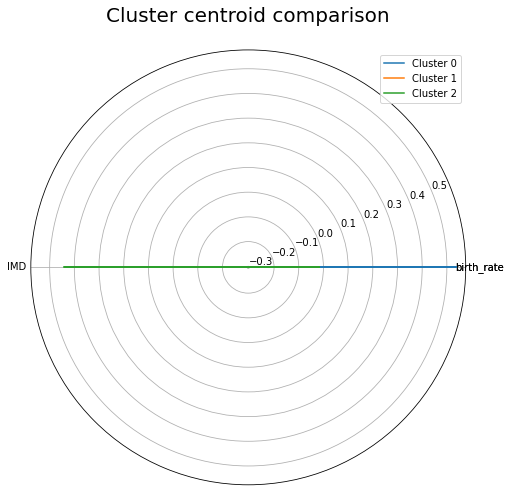

In [64]:
df_cluster_centroid = pd.DataFrame(kmeans_method.cluster_centers_, columns=normed.columns)
radar_plot_cluster_centroids(df_cluster_centroid)

In [67]:
# we fix the random_state so that the kmeans result is reproducible
num_clusters = 3
random_state_seed = 100
kmeans_output = sklc.KMeans(n_clusters=num_clusters, random_state=random_state_seed).fit(normed)

# Sanity check
print(kmeans_output)


KMeans(n_clusters=3, random_state=100)


In [68]:
# This line creates a list giving the final cluster number of each point:
clustering_ids_kmeans = kmeans_output.labels_

# You can print the clustering IDs to get an ordered list of labels
print(clustering_ids_kmeans)

[1 1 1 ... 0 0 1]


In [70]:
# we will combine the clustering IDs to the dataframe

data = raw_select.assign(cluster_id = clustering_ids_kmeans)

#Have a look at the result:
print(data)

           birth_rate     IMD  cluster_id
LSOA11CD                                 
E01000001    9.333333   6.208           1
E01000002   12.113055   5.143           1
E01000003   22.222222  19.402           1
E01000005    9.237875  28.652           2
E01000006   36.203522  19.837           0
...               ...     ...         ...
E01033742   26.415094  13.105           1
E01033743   29.084688  20.968           0
E01033744   43.632075  29.363           0
E01033745   33.966034  22.101           0
E01033746   24.193548  21.824           1

[4835 rows x 3 columns]


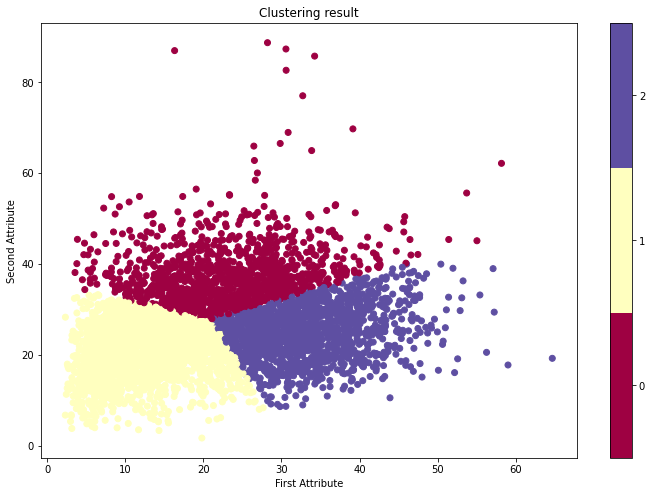

In [72]:
fig, ax = plt.subplots(figsize=(12,8))

# number of clusters
n_clusters = data.cluster_id.nunique()

# get discrete colormap
cmap = plt.get_cmap('Spectral', n_clusters)

# scatter points
scatter = ax.scatter(data.IMD, data.birth_rate, c=data.cluster_id, cmap=cmap)
ax.set_xlabel('First Attribute')
ax.set_ylabel('Second Attribute')
ax.set_title('Clustering result')

# add colorbar
cbar = plt.colorbar(scatter)

# set ticks locations (not very elegant, but it works):
# - shift by 0.5
# - scale so that the last value is at the center of the last color
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
cbar.set_ticks(tick_locs)

# set tick labels (as before)
cbar.set_ticklabels(np.arange(n_clusters))